In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


In [6]:
file = 'lane.png'

In [30]:
image = cv2.imread(file)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hls = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HLS)

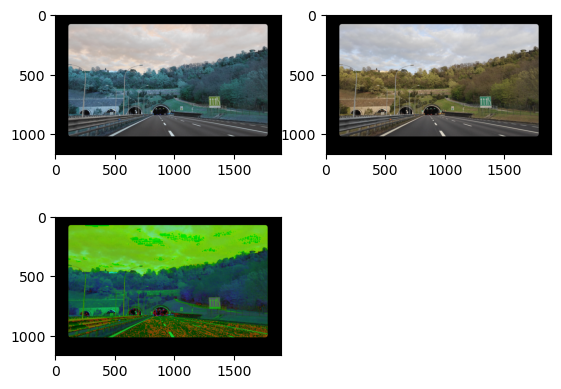

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1 = plt.imshow(image)
ax2 = fig.add_subplot(2,2,2)
ax2 = plt.imshow(image_rgb)
ax3 = fig.add_subplot(2,2,3)
ax3 = plt.imshow(image_hls)

In [9]:
yellower = (20,30,0)
yelupper = (40,100,100)
yellow_mask = cv2.inRange(image_hls, yellower, yelupper)
masked = cv2.bitwise_and(image_rgb, image_rgb, mask = yellow_mask)

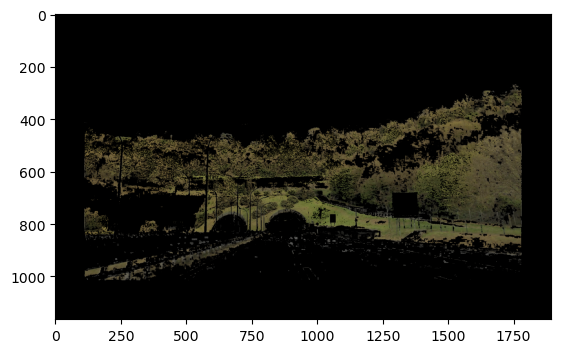

In [10]:
plt.imshow(masked)

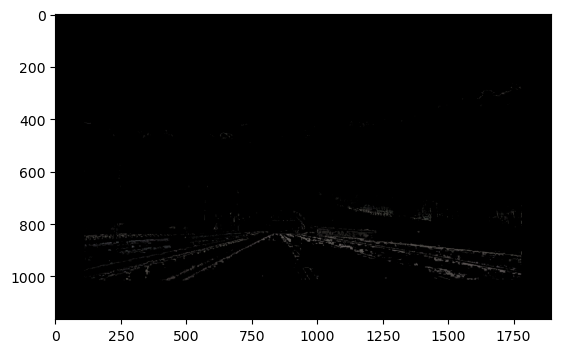

In [18]:
low_val = (0,30,8)
high_val = (300,100,17)
mask = cv2.inRange(image_hls, low_val, high_val)
masked = cv2.bitwise_and(image_rgb, image_rgb, mask = mask)
plt.imshow(masked)

In [19]:
yellow_lower = np.array([np.round( 40 / 2), np.round(0.00 * 255), np.round(0.35 * 255)])
yellow_upper = np.array([np.round( 60 / 2), np.round(1.00 * 255), np.round(1.00 * 255)])
yellow_mask = cv2.inRange(image_hls, yellow_lower, yellow_upper)


In [21]:
white_lower = np.array([np.round(  0 / 2), np.round(0.75 * 255), np.round(0.00 * 255)])
white_upper = np.array([np.round(360 / 2), np.round(1.00 * 255), np.round(0.30 * 255)])
white_mask = cv2.inRange(image_hls, white_lower, white_upper)


In [32]:
mask = cv2.bitwise_or(yellow_mask, white_mask)

masked = cv2.bitwise_and(image_rgb, image_rgb, mask= mask)

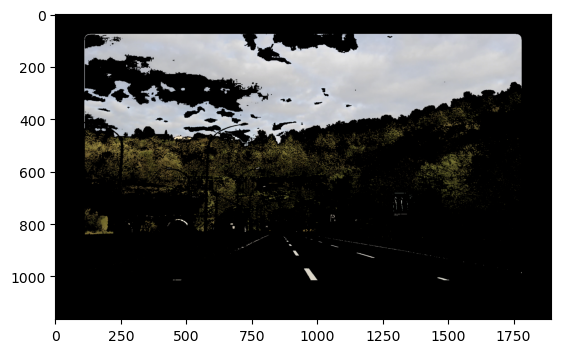

In [33]:
plt.imshow(masked)

In [60]:
def mask(image_hls, image_rgb):
    yellow_lower = np.array([np.round( 40 / 2), np.round(0.00 * 255), np.round(0.35 * 255)])
    yellow_upper = np.array([np.round( 60 / 2), np.round(1.00 * 255), np.round(1.00 * 255)])
    yellow_mask = cv2.inRange(image_hls, yellow_lower, yellow_upper)
    white_lower = np.array([np.round(  0 / 2), np.round(0.75 * 255), np.round(0.00 * 255)])
    white_upper = np.array([np.round(360 / 2), np.round(1.00 * 255), np.round(0.30 * 255)])
    white_mask = cv2.inRange(image_hls, white_lower, white_upper)
    
    mask = cv2.bitwise_or(yellow_mask, white_mask)
    masked = cv2.bitwise_and(image_rgb, image_rgb, mask= mask)
    return masked

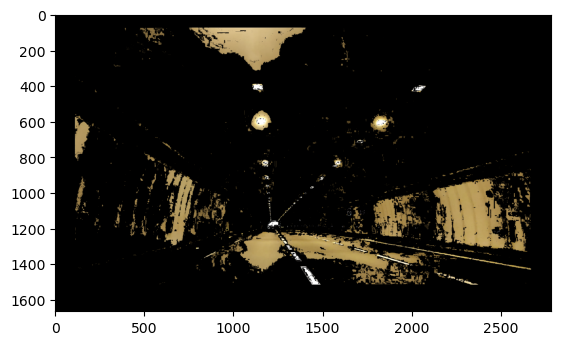

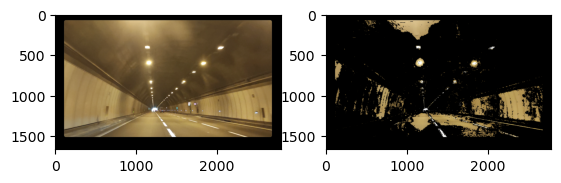

In [61]:
image1 = cv2.imread('lane_en.png')
image1_hsl = cv2.cvtColor(image1, cv2.COLOR_BGR2HLS)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

masked = mask(image1_hsl, image1_rgb)

plt.imshow(masked)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.imshow(image1_rgb)
ax2 = fig.add_subplot(1,2,2)
ax2 = plt.imshow(masked)

In [42]:
gray = cv2.cvtColor(masked,cv2.COLOR_RGB2GRAY)
blured = cv2.GaussianBlur(gray, (5,5),0)
cv2.imshow('blur', blured)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

32

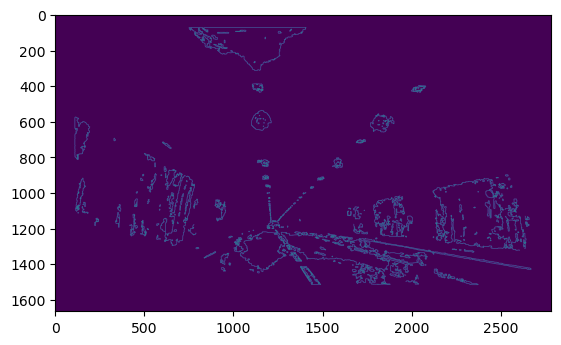

In [54]:
canny = cv2.Canny(blured, 150,450)
plt.imshow(canny)

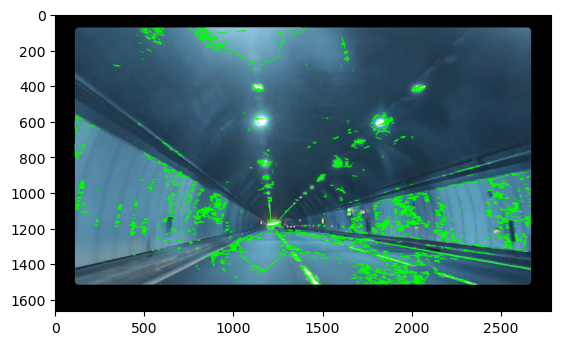

In [55]:
lines = cv2.HoughLinesP(canny,5, np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(image1,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(image1)
